In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data3.csv", nrows=118412, usecols=[i for i in range(16)])

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Data Preprocessing

In [4]:
df.shape

(118412, 16)

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,118412.000000,106620.000000,118337.000000,118412.000000,118412.000000
mean,2009.351611,29.563056,74563.892696,12645.523891,12336.922905
std,4.182964,13.742764,57257.494970,9368.544664,9410.178735
min,1984.000000,1.000000,1.000000,25.000000,1.000000
25%,2006.000000,21.000000,29475.000000,5600.000000,5200.000000
50%,2011.000000,33.000000,60332.000000,11350.000000,11000.000000
75%,2013.000000,41.000000,109832.000000,17100.000000,16900.000000
max,2015.000000,49.000000,999999.000000,157000.000000,156000.000000


In [6]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118412 entries, 0 to 118411
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          118412 non-null  int64  
 1   make          117786 non-null  object 
 2   model         117759 non-null  object 
 3   trim          117488 non-null  object 
 4   body          115125 non-null  object 
 5   transmission  104388 non-null  object 
 6   vin           118412 non-null  object 
 7   state         118412 non-null  object 
 8   condition     106620 non-null  float64
 9   odometer      118337 non-null  float64
 10  color         118198 non-null  object 
 11  interior      118198 non-null  object 
 12  seller        118412 non-null  object 
 13  mmr           118412 non-null  int64  
 14  sellingprice  118412 non-null  int64  
 15  saledate      118412 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 14.5+ MB


# Data Preparation

In [8]:
# We are dropping the columns that we do not need for our processing in future
df.drop(columns = ['saledate'], inplace = True)

# Finding Outliers

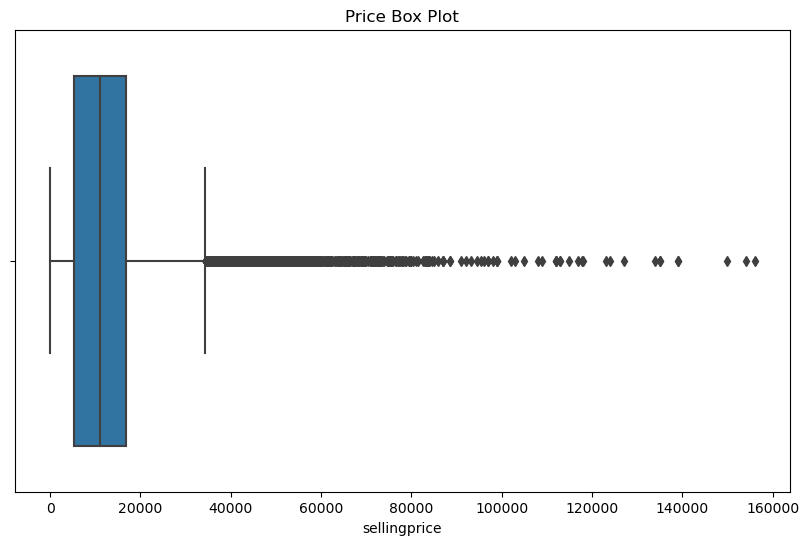

In [9]:
# Visualizing outliers with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Price Box Plot')
plt.show()

# Data Cleaning

In [10]:
# Handling outliers using the IQR method
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['sellingprice'] >= lower_bound) & (df['sellingprice'] <= upper_bound)]

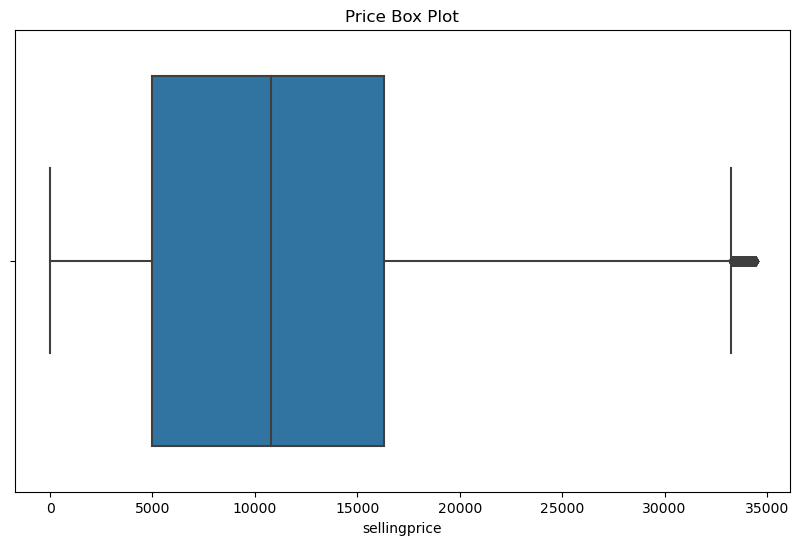

In [11]:
# Visualizing outliers with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Price Box Plot')
plt.show()

In [12]:
df.isnull().sum()

year                0
make              585
model             586
trim              883
body             3199
transmission    13649
vin                 0
state               0
condition       11723
odometer           75
color             179
interior          179
seller              0
mmr                 0
sellingprice        0
dtype: int64

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()

# Filling missing values with the median (for numerical columns) or mode (for categorical columns)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Display the updated missing values count to confirm there are no more missing values
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

# EDA

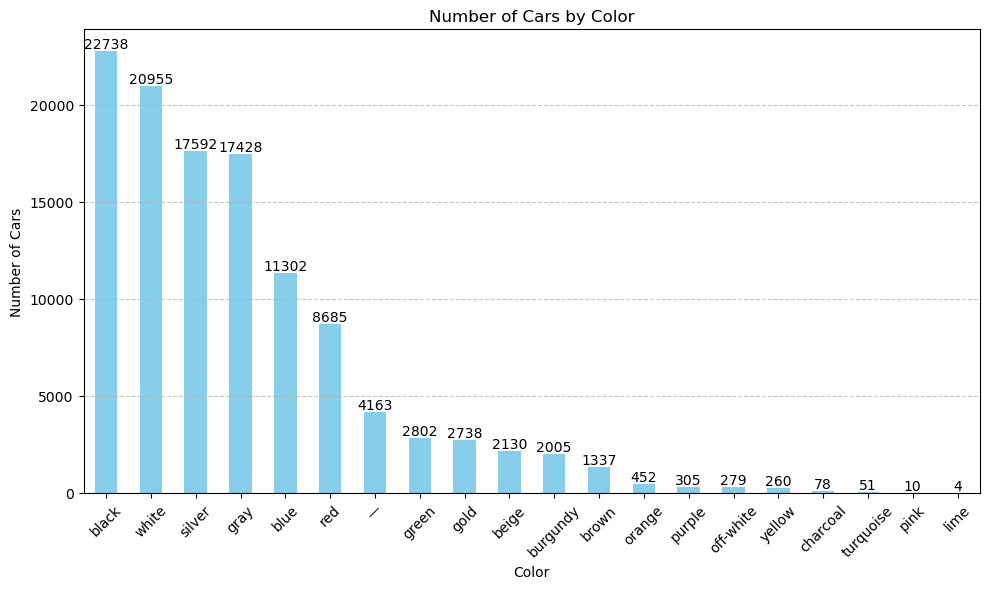

In [14]:
# Count the number of cars for each color
color_counts = df['color'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
bars = color_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height()}', 
             ha='center', 
             va='bottom')

plt.title('Number of Cars by Color')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

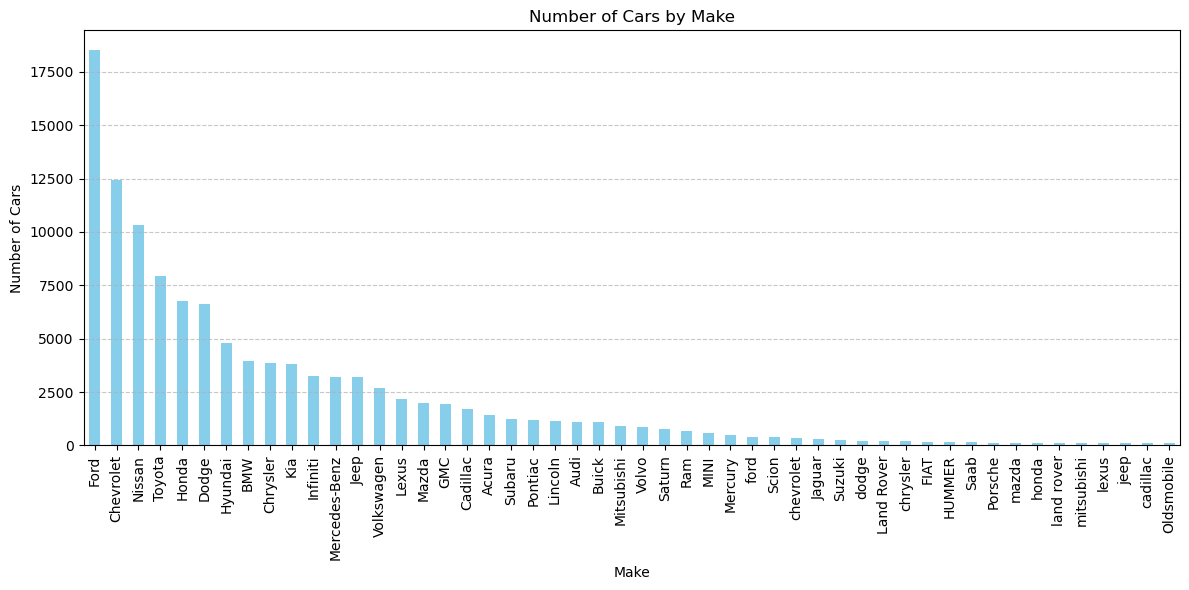

In [15]:
make_counts = df['make'].value_counts()

# Plotting the histogram
plt.figure(figsize=(12, 6))
make_counts[:50].plot(kind='bar', color='skyblue')

plt.title('Number of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

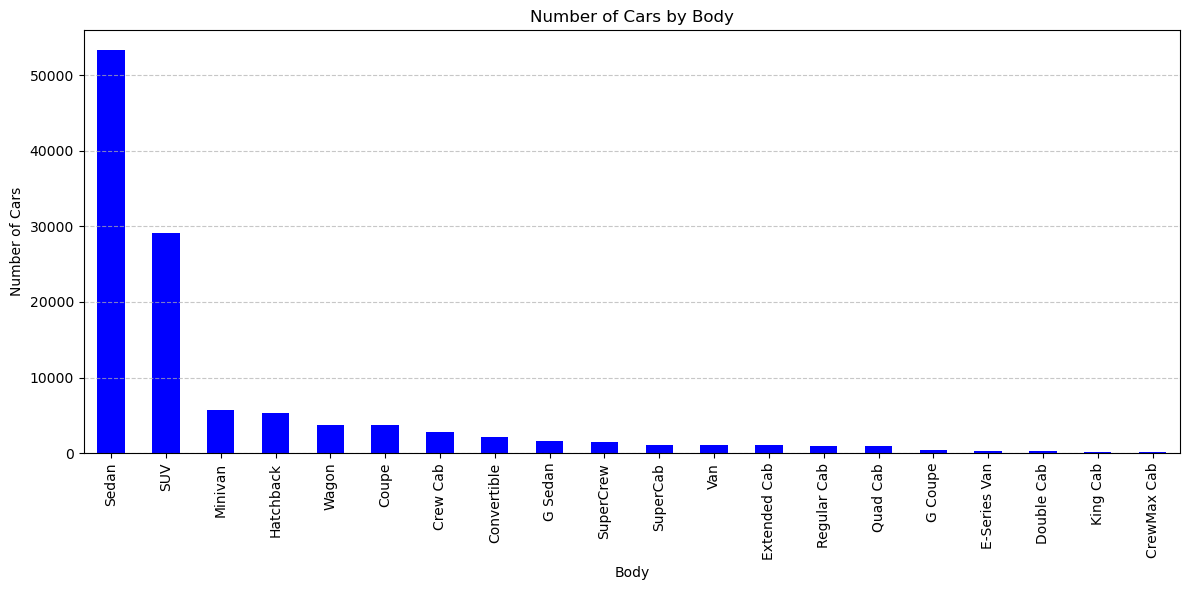

In [16]:
make_counts = df['body'].value_counts()

# Plotting the histogram
plt.figure(figsize=(12, 6))
make_counts[:20].plot(kind='bar', color='blue')

plt.title('Number of Cars by Body')
plt.xlabel('Body')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

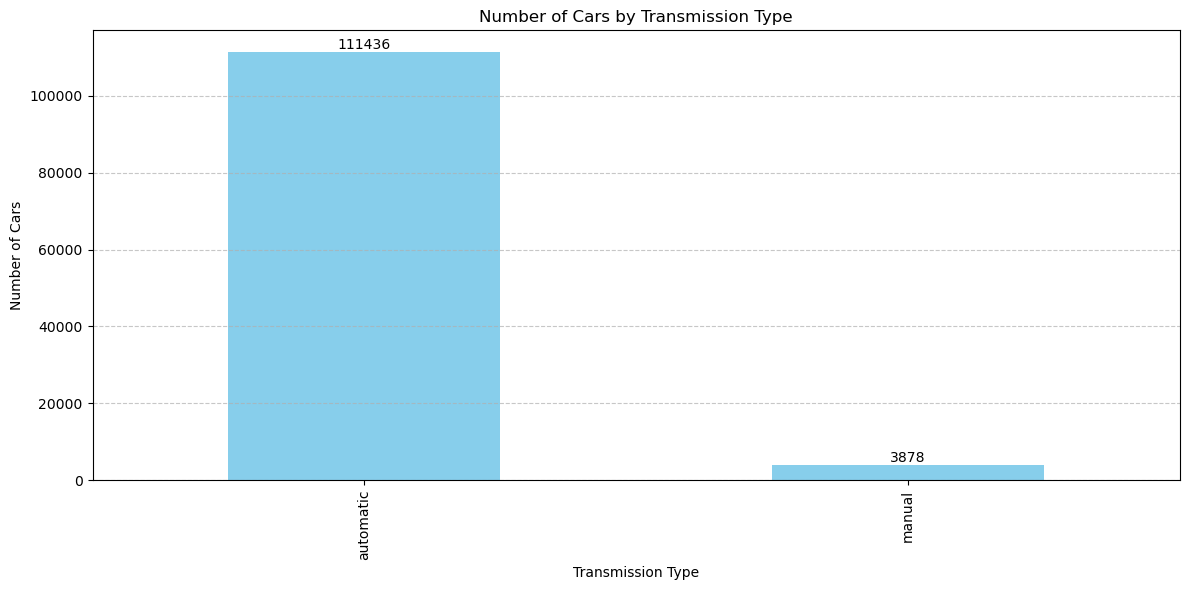

In [17]:
make_counts = df['transmission'].value_counts()

# Plotting the histogram
plt.figure(figsize=(12, 6))
bars = make_counts.plot(kind='bar', color='skyblue')

# Adding count values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height()}', 
             ha='center', 
             va='bottom')

plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

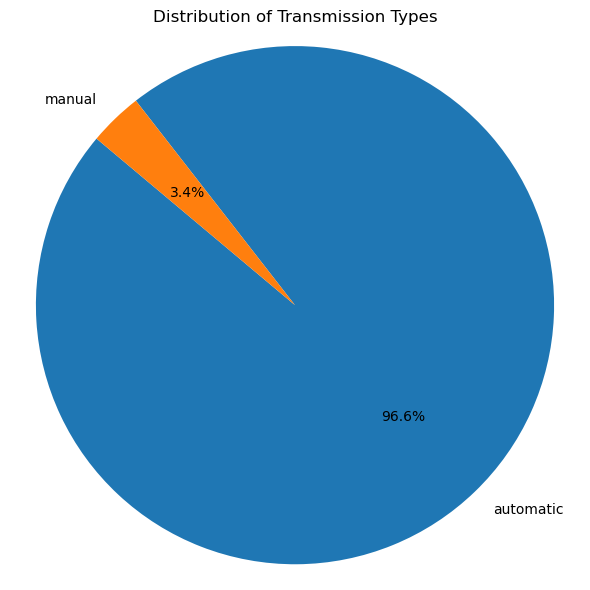

In [18]:
transmission_counts = df['transmission'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


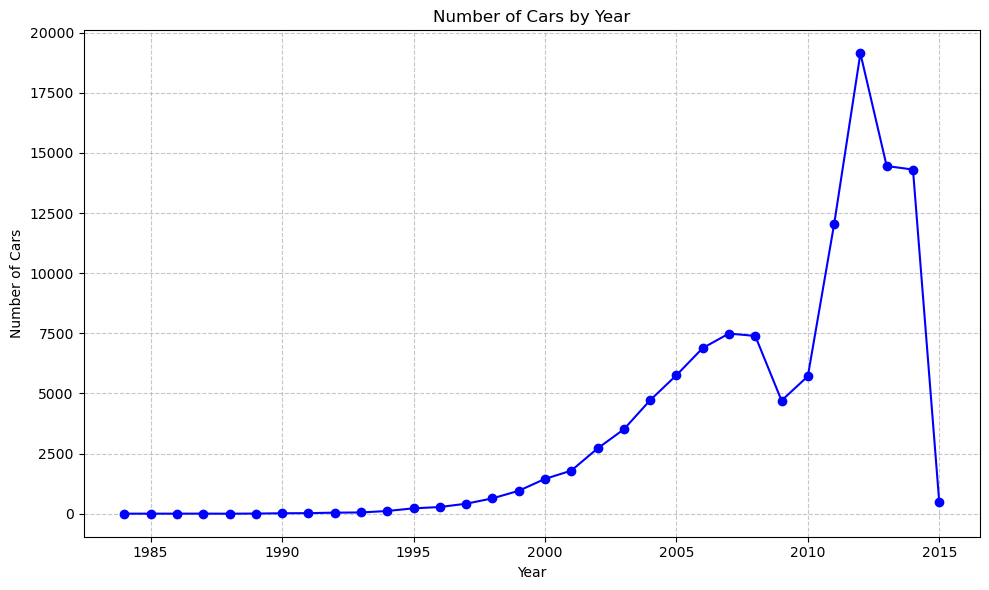

In [19]:
year_counts = df['year'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', marker='o', color='blue')

plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# Create a new categorical column based on sellingprice
df['price_category'] = df['sellingprice'].apply(lambda x: '<$11k' if x < 11000 else '>$11k')

In [21]:
df.to_csv('data_for_power_bi.csv', index = False)

# Algorithm 1: K-Means Clustering

In [22]:
def k_means_clustering(df, clusters):
    # Selecting the relevant columns
    data = df[['year', 'sellingprice']]

    # Handle any missing values
    data = data.dropna()

    # K-means Clustering
    kmeans = KMeans(n_clusters=clusters, random_state=0)  # You can adjust the number of clusters
    clusters = kmeans.fit_predict(data)

    # Visualization
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data['year'], data['sellingprice'], c=clusters, cmap='viridis')
    plt.title('Cluster Visualization on Odometer and Selling Price')
    plt.xlabel('Year')
    plt.ylabel('Selling Price')
    plt.colorbar(scatter)
    plt.show()

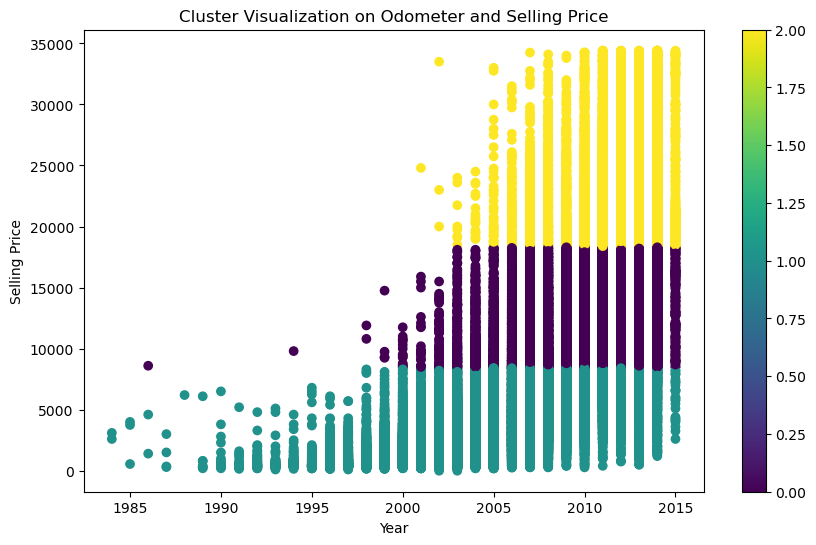

In [23]:
k_means_clustering(df, 3)

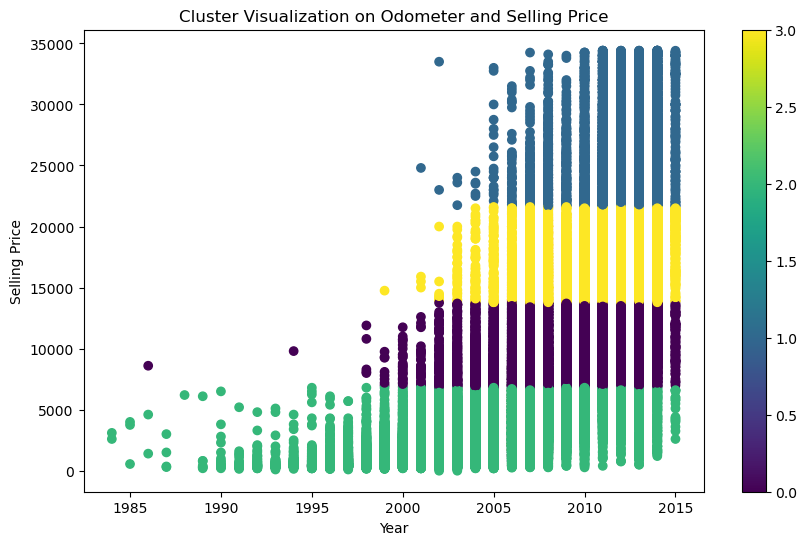

In [24]:
k_means_clustering(df, 4)

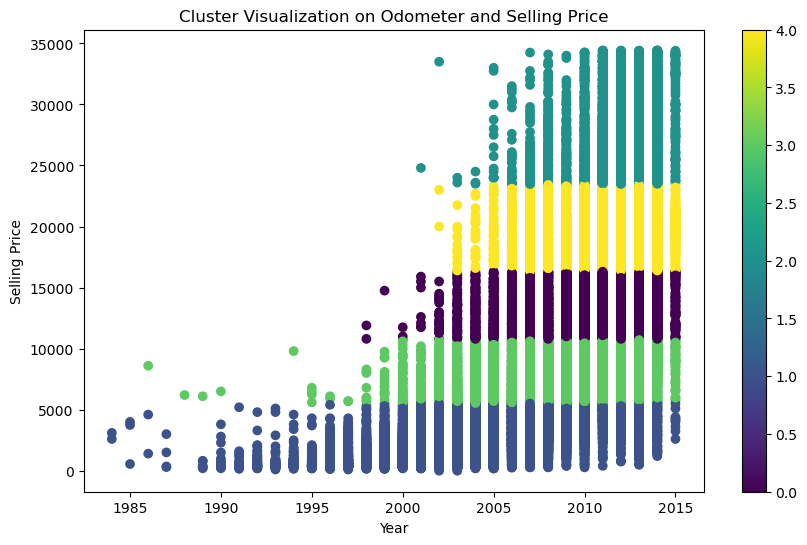

In [25]:
k_means_clustering(df, 5)

# Algorithm 2: Hierarchical Clustering

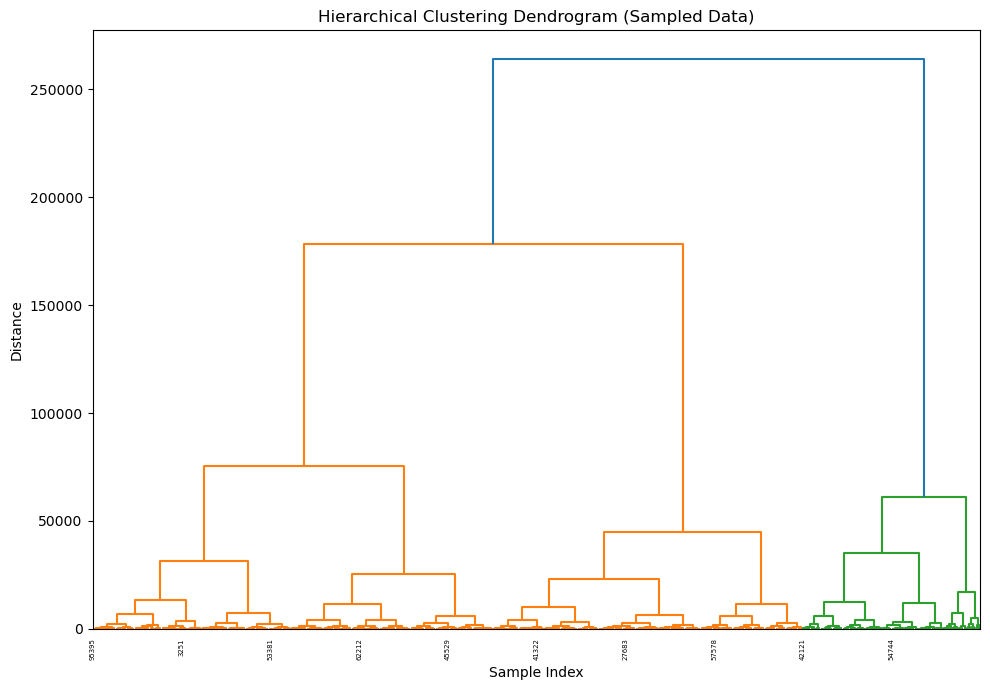

In [26]:
# Selecting the relevant columns and drop missing values
data = df[['year', 'sellingprice']].dropna()

# Sampling the data
sample_data = data.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Hierarchical Clustering
linked = linkage(sample_data, method='ward')

# Visualization - Dendrogram
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    orientation='top',
                    labels=sample_data.index.to_list(),
                    distance_sort='descending',
                    show_leaf_counts=True)

# Reduce the number of x-axis labels and rotate them
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for i, lbl in enumerate(xlbls):
    if i % 100 != 0:  # Show only every 10th label
        lbl.set_visible(False)
    lbl.set_rotation(90)  # Rotate labels for better readability

plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


# Algorithm 3: K-Nearest Neighbours

Classification Report:
              precision    recall  f1-score   support

       <$11k       0.80      0.79      0.80     11702
       >$11k       0.79      0.80      0.79     11361

    accuracy                           0.79     23063
   macro avg       0.80      0.80      0.79     23063
weighted avg       0.80      0.79      0.80     23063



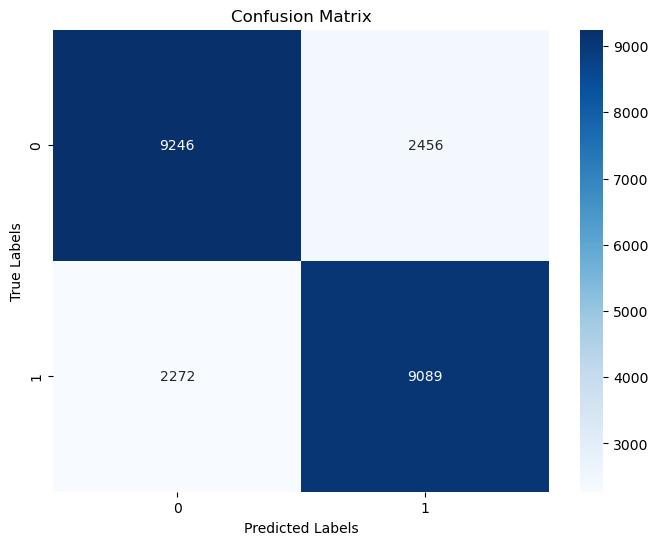

In [27]:
# Select the necessary columns for prediction
X = df[['year', 'odometer', 'condition']]
y = df['price_category']

# Encode categorical variables if needed
label_encoders = {}
for col in X.select_dtypes(include=['object']):
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Predict the 'price_category' column
y_pred = knn.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Validation

In [28]:
# Actual value is >#11k

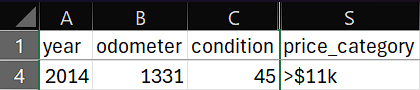

In [29]:
# Predicted value is accurate
print(knn.predict(np.array([[2014, 1331, 45]])))

['>$11k']


# Algorithm 4: Linear Regression

In [30]:
# Select the necessary columns for prediction
X = df[['year', 'odometer', 'condition']]
y = df['sellingprice']

# Encode categorical variables if needed
label_encoders = {}
for col in X.select_dtypes(include=['object']):
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the 'sellingprice' column
y_pred = lr.predict(X_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 5267.355212531186
Mean Absolute Error (MAE): 4070.1766314436545


# Linear Regression Validation

In [31]:
# Actual value is 17,500

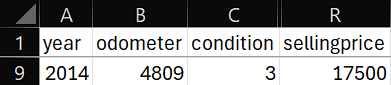

In [32]:
# Predicted value is very close which is 15,847
print(lr.predict(np.array([[2014, 4809, 3]])))

[15847.81088332]
